In [1]:
import pandas as pd

activities = pd.read_pickle("activities.pkl.gz")

In [2]:
activities

,activityId,name,activityType,sportType,duration,elapsedDuration,movingDuration,avgHr,maxHr,calories,...,maxBikeCadence,avgPower,normPower,steps,trainingEffectLabel,activityTrainingLoad,aerobicTrainingEffectMessage,anaerobicTrainingEffectMessage,moderateIntensityMinutes,vigorousIntensityMinutes
timeStamp,,,,,,,,,,,,,,,,,,,,,
2018-07-18 07:03:43,2860988982,Cardio,indoor_cardio,GENERIC,0 days 00:45:19.495117188,0 days 00:45:19.495117188,NaT,103,133,1115,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-19 08:15:04,2863770960,Chicago Walking,walking,WALKING,0 days 00:34:25.272949219,0 days 00:34:25.272949219,0 days 00:33:49,104,115,1068,...,<NA>,<NA>,<NA>,3538,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-20 08:58:03,2866651400,Chicago Walking,walking,WALKING,0 days 00:40:20.044921875,0 days 00:51:25.504882812,0 days 00:37:20,109,123,1018,...,<NA>,<NA>,<NA>,4054,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-21 11:55:31,2869714543,Chicago Cycling,cycling,CYCLING,0 days 02:55:15.018554688,0 days 02:55:15.018554688,0 days 02:37:57,127,155,6176,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
2018-07-22 10:26:41,2872012072,Cardio,indoor_cardio,GENERIC,0 days 00:37:04.967041016,0 days 00:37:04.967041016,NaT,89,136,754,...,<NA>,<NA>,<NA>,<NA>,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-15 08:39:16,7964125847,Chicago Walking,walking,WALKING,0 days 00:32:56.312988281,0 days 00:32:56.312988281,0 days 00:30:19,113,128,809,...,<NA>,<NA>,<NA>,3368,RECOVERY,10.666061,RECOVERY_5,NO_ANAEROBIC_BENEFIT_0,32.0,0.0
2021-12-15 09:36:34,7964412400,Chicago Walking,walking,WALKING,0 days 00:12:27.656005859,0 days 00:12:27.656005859,0 days 00:11:56,114,126,339,...,<NA>,<NA>,<NA>,1316,UNKNOWN,8.715408,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,10.0,0.0
2021-12-15 10:19:52,7964533731,Chicago Walking,walking,WALKING,0 days 00:28:01.192993164,0 days 00:28:05.436035156,0 days 00:23:15.781000,108,126,654,...,<NA>,<NA>,<NA>,2384,UNKNOWN,9.048019,NO_AEROBIC_BENEFIT_18,NO_ANAEROBIC_BENEFIT_0,24.0,2.0


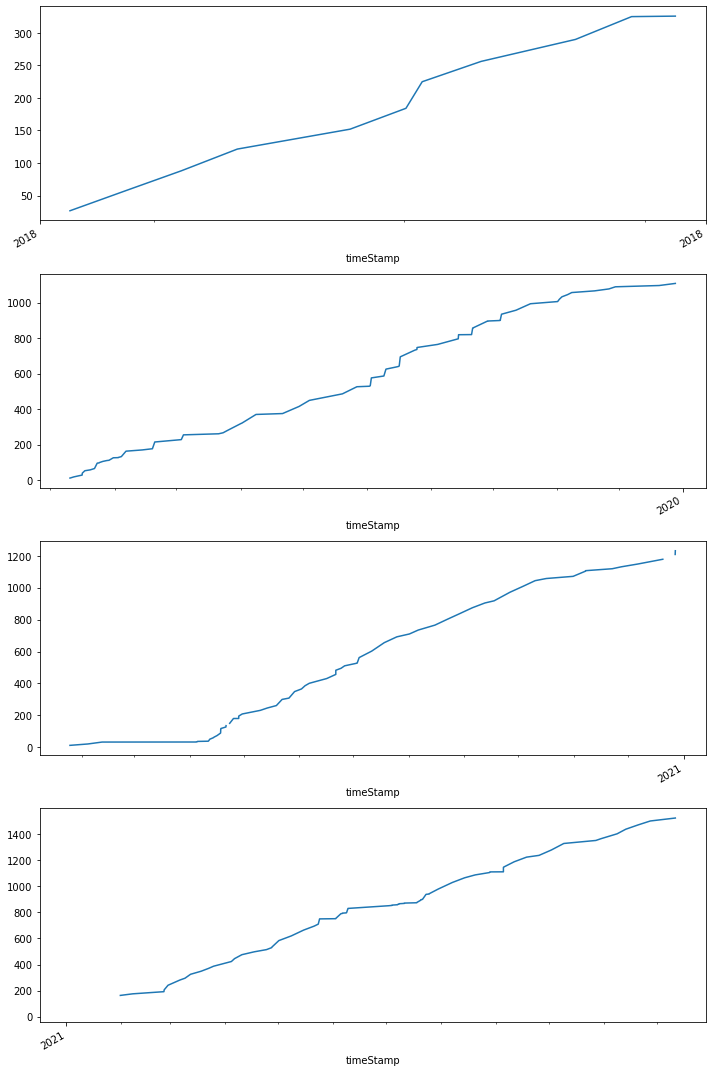

In [3]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=4, figsize=(10, 15))

mask = activities.sportType == "CYCLING"
first_year = activities[mask].index.min().year

for year, group in activities[mask].distanceMiles.groupby(pd.Grouper(freq="Y")):
    ax = axes[year.year - first_year]
    
    # Major ticks every half year, minor ticks every month,
    ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1)))
    ax.xaxis.set_minor_locator(mdates.MonthLocator())
    ax.grid(True)
    group.cumsum().plot.line(ax=ax, x=group.index)

plt.tight_layout()
plt.show()